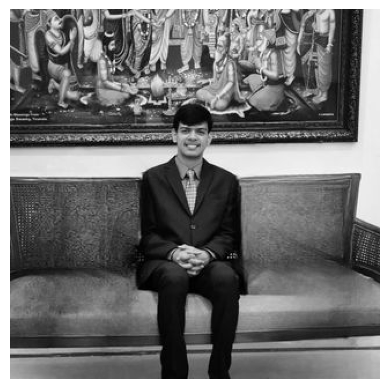

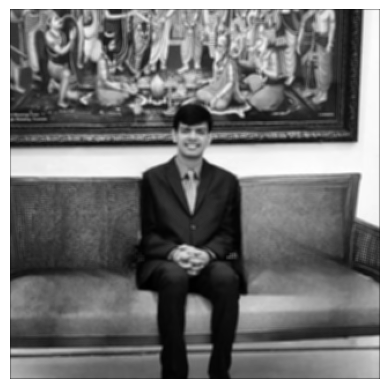

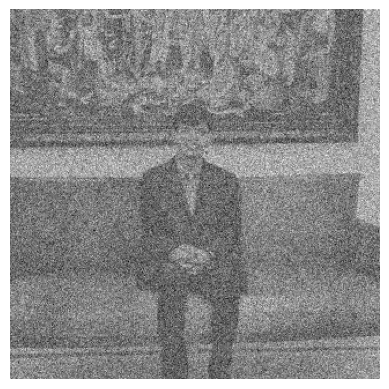

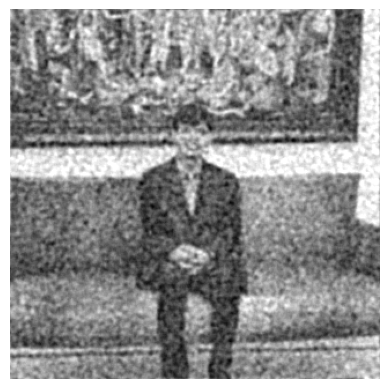

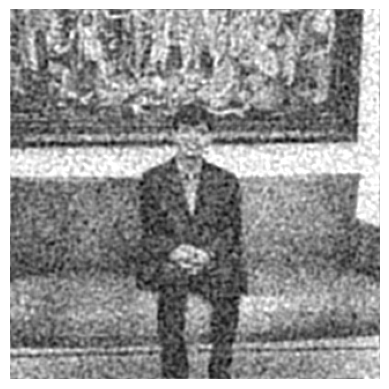

PSNR blur image: 10.466
PSNR method 1: 19.131
PSNR method 2: 18.692


In [5]:
import numpy as np
import cv2
from skimage.io import imread
from skimage import color, data, restoration
from scipy.signal import convolve2d
from skimage.util import random_noise
import matplotlib.pyplot as plt

# plot function
def display(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# original image
#img = color.rgb2gray(data.astronaut())
img = cv2.imread(r"C:\Users\samar\Desktop\karthik.png",0)
img = img/255
display(img)

# point spread function: kernel
k = 3
psf = np.ones((k,k)) / (k*k)
psf

img1 = convolve2d(img, psf, 'same')
display(img1)

# create and add gaussian noise
x, y = img.shape
mean = 0
var = 0.09
sigma = np.sqrt(var)
n = np.random.normal(loc=mean, scale=sigma, size=(x,y))

img1 = img + n
display(img1)

# image restoration: unsupervised_wiener()
imgRestor, chains = restoration.unsupervised_wiener(img1, psf=psf)
display(imgRestor)

# image restoration: wiener()
imgRestor2 = restoration.wiener(img1, psf=psf, balance=0.35)
display(imgRestor2)

# evaluate the result
from skimage.metrics import peak_signal_noise_ratio
psnr0 = peak_signal_noise_ratio(image_true=img, image_test=img1)
psnr1 = peak_signal_noise_ratio(image_true=img, image_test=imgRestor)
psnr2 = peak_signal_noise_ratio(image_true=img, image_test=imgRestor2)

print(f"PSNR blur image: {psnr0:.3f}")
print(f"PSNR method 1: {psnr1:.3f}")
print(f"PSNR method 2: {psnr2:.3f}")